# Reto 3: El problema final

Este reto consiste en predecir si una imagen contiene o no signos de retinopatía diabética (DR).
Para ello se proporciona un conjunto de datos que contiene características extraídas de imágenes.
Las características extraídas son:
+ [0] Evaluación de la calidad de la imagen , donde 0 = mala calidad 1 = calidad suficiente.
+ [1] El resultado binario de la evaluación previa, donde 1 indica una anormalidad retiniana severa y 0 su falta.
+ [2-7] Los resultados de la detección de microaneurismas (MA). Cada valor de característica representa el número de MAs encontrados en los niveles de confianza alfa = 0.5, ... , 1, respectivamente.
+ [8-15] contienen la misma información que [2-7] para los exudados. <br>
Sin embargo, ya que los exudados están representados por un conjunto de puntos en lugar del número de
píxeles de las lesiones, estas características se normalizan dividiendo los número de lesiones por  el diámetro de la ROI para compensar las diferentes tamaños de las imágenes.
+ [16] La distancia euclidiana del centro dela mácula y el centro del disco óptico para proporcionar información importante con respecto a la condición del paciente. Esta característica también se normaliza con el diámetro de la ROI
+ [17] El diámetro del disco óptico.
+ [18] El resultado binario de la clasificación basada en AM/FM.
+ [19] Etiqueta de clase. 1 = contiene signos de DR

El conjunto de datos, *retinopatia_reto3.csv*, consiste en 592 muestras de imágenes; cada uno de ellos representado por 19 características.

Para evaluar las propuestas se utilizará un conjunto de datos que se mantendrá oculto hasta después de la entrega

### Requisitos
+ **Se debe utilizar algún tipo de reducción de la dimensión o aprendizaje de variedades**
+ A continuación se debe entrenar un clasificador o combinación de clasificadores con las características transformadas según el requisito anterior.
+ Se debe entregar un cuaderno Jupyter con el nombre de los participantes.<br>
  *Por ejemplo*:   **Cuesta_Hinton.ipynb**
+ El cuaderno entregado debe seguir la estructura y reglas de este cuaderno

### Competición
+ Todos los cuadernos entregados se subirán al repo de GitHub y se ejecutarán en Binder, donde ya estará en conjunto de test que estaba oculto.
+ El resultado que se obtenga será la puntuación del reto.
+ **Importante** Es muy fácil asegurarte de que tu código funciona:
    1. Agrupa todo tu código en una única celda
    2. Copialo en el cuaderno del reto que hay en Binder
    3. Ejecuta el cuaderno 
    
### Plazo: lunes 16 de nov. a las 6 am.
Es decir, incluye toda la noche del domingo 15 de nov.
 
> "The final problem", A. C. Doyle (Strand Magazine, diciembre 1983), 
es el relato corto en el que Sherlock Holmes se enfrenta al Prof. Moriarty en las cataratas Reichenbach.

---
    [ES] Código de Alfredo Cuesta Infante para 'Reconocimiento de Patrones'
       @ Master Universitario en Visión Artificial, 2020, URJC (España)
    [EN] Code by Alfredo Cuesta-Infante for 'Pattern Recognition'
       @ Master of Computer Vision, 2020, URJC (Spain)

    alfredo.cuesta@urjc.es

In [1]:
# NO TOCAR ESTA CELDA
# Conjunto distribuido para el reto

Challange_filename = '../../Datasets/retinopatia_reto3.csv'

In [2]:
# NO TOCAR ESTA CELDA
# El conjunto de test cambiará una vez se cierre la entrega
# Ahora mismo es el mismo conjunto que el de entrenamiento

Test_filename = '../../Datasets/retinopatia_test.csv' #<-- este nombre cambiará después del plazo de entrega

In [3]:
# NO TOCAR ESTA CELDA

#-[1]. Load data from CSV and put all in a single dataframe 'FullSet'

import numpy  as np
import pandas as pd
from matplotlib import pyplot as plt
import sys
sys.path.append('../../MyUtils/')
import MyUtils as my
seed = 1234 #<- random generator seed (comment to get randomness)

#-[2]. Load data from CSV and put all in a single dataframe 'FullSet'

FullSet = pd.read_csv(Challange_filename, header=0)
FullX = FullSet.iloc[:,:-1]
FullY = FullSet.iloc[:,-1]

<table style="width:100%;"> 
 <tr style='background:lime'>
  <td style="text-align:left">
      <h2>Tu código debe empezar a partir de aquí y puede tener tantas celdas como quieras</h2>
      <p> Si quieres, puedes borrar (o convertir en RawNBConvert) las celdas de ejemplo
      <h3>Importante:</h3>
      <p>Tu código debe producir las siguientes variables: </p>
      <p> $\quad \bullet$ <b>clf:</b> el clasificador final con el que se realizará el test<br>
       $\quad \bullet$ <b>X_test:</b> el conjunto de test listo para ser usado por el método <b>predict</b><br>
       $\quad \bullet$ <b>Y_test:</b> es el vector de etiquetas del conjunto de X_test listo para ser usado por el método <b>confusion_matrix</b>
      </p>
  </td>
 </tr>
</table>

In [4]:
nombres = ["Alfredo Cuesta", "Geoffrey Hinton"]

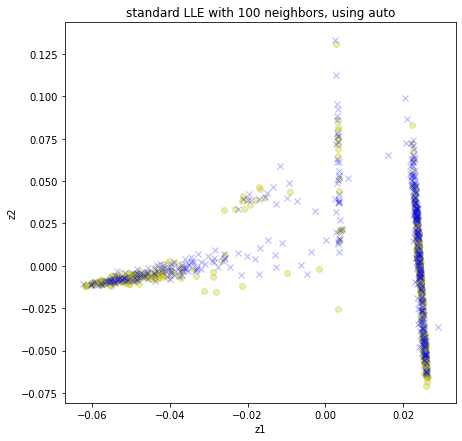

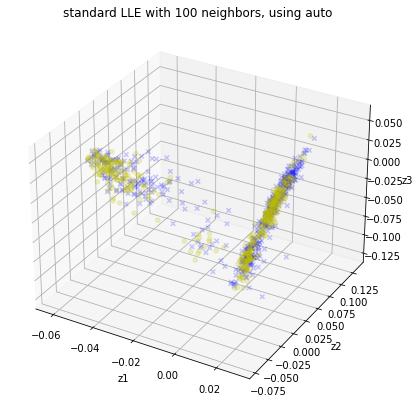

'RESULTADO: X_test es el dataframe para utilizar en >>> Y_pred = clf.predict() \n   RESULTADO: Y_test es el array con las etiquetas para utilizar en >>> confusion_matrix(Y_test,Y_pred)\n'

In [5]:
#--preprocesado --

from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

#-- Aquí se escala --

scaler = MinMaxScaler()
X = scaler.fit_transform(FullX)
Y = FullY.values.ravel() 

#-- entrenamiento --

clf = SVC(kernel='poly', C=3, gamma=1, coef0=0.1, degree=4, random_state = seed)
clf.fit( X, Y )

from sklearn.manifold import LocallyLinearEmbedding

n_components = 10
n_neighbors  = 100
method = "standard"   # options are: "standard", "hessian", "modified" or "ltsa"
neighbors_algorithm = "auto" # options are : "auto", "brute", "kd_tree", "ball_tree"

lle = LocallyLinearEmbedding(n_components = n_components, n_neighbors=n_neighbors,
                             method = method, neighbors_algorithm = neighbors_algorithm)
X_proy = lle.fit_transform(X)

plt.rcParams['figure.figsize'] = [7,7] #<- this makes the figures larger in Jupyter

fig_number = 0
plot_proy2d = True
plot_proy3d = True

if plot_proy2d:
    fig_number=fig_number+1
    plt.figure(fig_number)
    ind0 = Y==0
    ind1 = Y==1
    plt.plot(X_proy[ind0,0],X_proy[ind0,1], 'yo', alpha=.3)
    plt.plot(X_proy[ind1,0],X_proy[ind1,1], 'bx', alpha=.3)
    plt.xlabel('z1')
    plt.ylabel('z2')
    strTitle = "%s LLE with %d neighbors, using %s" %(method, n_neighbors, neighbors_algorithm)
    plt.title(strTitle)

if plot_proy3d:
    from mpl_toolkits.mplot3d import Axes3D
    fig_number=fig_number+1
    fig = plt.figure(fig_number)
    ax = fig.add_subplot(111, projection='3d')
    ind0 = Y==0
    ind1 = Y==1
    ax.scatter(X_proy[ind0,0],X_proy[ind0,1],X_proy[ind0,2], c='y',marker='o', alpha=.2)
    ax.scatter(X_proy[ind1,0],X_proy[ind1,1],X_proy[ind1,2], c='b',marker='x', alpha=.2)
    ax.set_xlabel('z1')
    ax.set_ylabel('z2')
    ax.set_zlabel('z3')
    strTitle = "%s LLE with %d neighbors, using %s" %(method, n_neighbors, neighbors_algorithm)
    plt.title(strTitle)

plt.show()

#--test --

FullSet = pd.read_csv(Test_filename, header=0)
TestX_ = FullSet.iloc[:,:-1]
TestY_ = FullSet.iloc[:,-1]
X_test = scaler.transform(TestX_) 
Y_test = TestY_.values.ravel() 
#-la evaluación se realiza en las celdas de abajo

'''RESULTADO: X_test es el dataframe para utilizar en >>> Y_pred = clf.predict() 
   RESULTADO: Y_test es el array con las etiquetas para utilizar en >>> confusion_matrix(Y_test,Y_pred)
'''

<table style="width:100%;"> 
 <tr style='background:pink'>
  <td style="text-align:left">
      <h2>A partir de aquí ya no se pueden modificar las celdas</h2>
          <h3>Comprueba que:</h3>
          <p> $\quad \bullet$ tu clasificador está almacenado en la variable <b>clf</b><br>
              $\quad \bullet$ tienes el conjunto de test correctamente almacenado en la variable <b>X_test</b><br>
              $\quad \bullet$ tienes las etiquetas del conjunto de test correctamente almacenadas en la variable <b>Y_test</b><br>
          </p>
      
  </td>
 </tr>
</table>

## Test

In [6]:
# NO TOCAR ESTA CELDA

from sklearn.metrics import confusion_matrix

Y_hat = clf.predict(X_test)
conf_mat = confusion_matrix(Y_test , Y_hat)
N_success  = np.trace(conf_mat)
N_fails = Y_test.shape[0]-N_success
#-------------------------------
print (nombres,"\n")
print("Confusion matrix:\n")
print(conf_mat,"\n")
print("Outcome:\n")
strlog = "  :) HIT  = %d, (%0.2f%%)"%(N_success, 100*N_success/(N_success+N_fails))
print(strlog)
strlog = "  :( FAIL = %d, (%0.2f%%)"%(N_fails, 100*N_fails/(N_success+N_fails))
print(strlog)

['Alfredo Cuesta', 'Geoffrey Hinton'] 

Confusion matrix:

[[405  41]
 [135 370]] 

Outcome:

  :) HIT  = 775, (81.49%)
  :( FAIL = 176, (18.51%)
